# 04 - Distribuição Normal e Teorema Central do Limite

Nessa aula, iremos tratar dos seguintes conteúdos:
- Distribuição Normal
- Teorema Central do Limite

<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>

## 

## Distribuição Normal

A distribuição normal é uma das distribuições mais conhecidas da estatística/probabilidade! Ela é  representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (bell shape).  

A curva de distribuição normal representa o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

<br><br>

### Definição Matemática

A Variável aleatória contínua $X$ que tome todos os valores na reta real $-\infty < X < \infty$ segue uma distribuição normal (ou Gaussiana) se sua função de densidade de probabilidade é dada por:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}} $$

Onde respectivamente temos como __valor esperado__ e __variância__ da distribuição normal:

- __Valor esperado:__ $E[X] = \mu$

- __Variância:__ $V[X] = \sigma^2$


<br>

Usualmente aplicamos a notação X ~ N($\mu$,$\sigma^2$) para representar uma variável aleatória **com distribuição normal** de valor esperado/média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>


Em uma distribuição normal a média, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">


Vamos ver algumas formas de gerarmos valores de acordo com uma distribuição Normal:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [2]:
# função densidade de probabilidade da normal
def normal_dist(x, mu, sigma):
    prob_density = (1/(sigma*math.sqrt(2*np.pi)))*np.exp(-0.5*((x - mu)/(sigma))**2)
    return prob_density

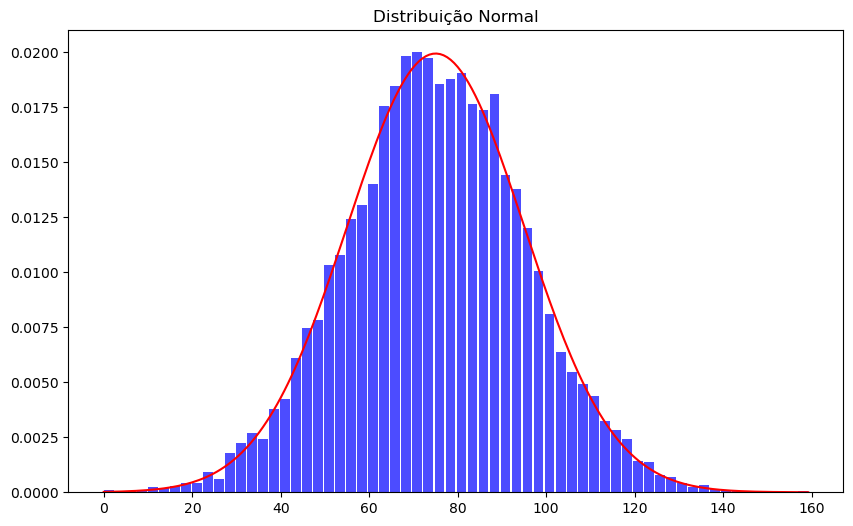

In [3]:
# Definindo os parametros
mu = 75
sigma = 20

# Vamos gerar algumas amostras
N = 10000 #tamanho da amostra
X = np.random.normal(mu, sigma, N)

# Define o tamanho da figura
plt.figure(figsize = (10, 6))

# Vamos criar um histograma
plt.hist(X,
         bins = 'auto',
         density = True,
         color = 'blue',
         alpha = 0.7,
         rwidth = 0.9)

# Define um range de x's
x = np.linspace(np.min(X), np.max(X), 200)

# Calcular a curva
pdf = normal_dist(x, mu, sigma)

# Cria um titulo
plt.title("Distribuição Normal")

# Plot da curva
plt.plot(x, pdf, color = 'red')

# Mostra o gráfico
plt.show()

In [ ]:
# Como calcular a probabilidade com o scipy
#!pip install scipy

In [4]:
# Carregando a biblioteca
import scipy

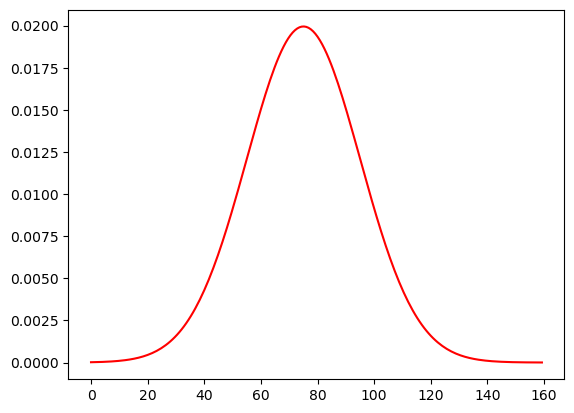

In [5]:
# gerando a mesma curva
y = scipy.stats.norm(loc = mu,
                     scale = sigma).pdf(x)

# Plot da curva
plt.plot(x, y, color = 'red')

# mostra o grafico
plt.show()

## 

## Normalização ou Z-Score
<br>

Imagine ter que calcular a probabilidade de uma distribuição normal de um determinado evento, utilizando a função de densidade de probabilidade. Seria bastante trabalho e nem um pouco usual! 

Para isso então que existe uma relação conhecida como normalização ou __Z-Score__, onde este parâmetro nada mais é que __o número de desvios padrões que a observação está com relação à média__:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$


<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>
<br>

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers. Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

<br>

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**



onde o objetivo é convertermos os dados para uma distribuição normal na forma X ~ N($\mu$, $\sigma^2$) 

**Exemplo**: Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

In [6]:
# trazer a função st do scipy
import scipy.stats as st

# media
mu = 165

# desvio padrão
sigma = np.sqrt(9)

# Calculando o Z
z = (162 - mu)/sigma

# Print do Z e da probabilidade
print("Z-Score: ", z)
print("Probabilidade: ", st.norm.cdf(z))

Z-Score:  -1.0
Probabilidade:  0.15865525393145707


**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

Obs.: Lembrando que para calcular essa probabilidade temos que fazer da seguinte forma:

$$ P(X > 13) = 1 - P( X \leq 13) $$

In [7]:
# media
mu = 10

# desvio padrão
sigma = np.sqrt(4)

# Zscore para o 13
z = (13 - mu)/sigma

# Print do Z e da probabilidade
print("Z-Score: ", z)
print("Probabilidade: ", 1 - st.norm.cdf(z))

Z-Score:  1.5
Probabilidade:  0.06680720126885809


**Exemplo:** O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam:

a) entre 60 e 77,5 Kg.

$$
P(60 \leq X \leq 77,5) = P\left(\frac{60-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{77,5-\mu}{\sigma}\right)=P\left(\frac{60-\mu}{\sigma} \leq Z \leq \frac{77,5-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{77,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{60-\mu}{\sigma}\right)
$$ 


In [9]:
# media
mu = 75.5

# desvio padrão
sigma = 7.5

# Calcular o z1 - 60 kg
z1 = (60 - mu)/sigma

# Calculando o z2 - 77.5 kg
z2 = (77.5 - mu)/sigma

# Print do Z e da probabilidade
print("Z-Score 1: ", z1)
print("Z-Score 2: ", z2)
print("Probabilidade: ", st.norm.cdf(z2) - st.norm.cdf(z1))

Z-Score 1:  -2.066666666666667
Z-Score 2:  0.26666666666666666
Probabilidade:  0.5857543024471563


Podemos também resolver este item simulando os resultados:

In [10]:
# definindo as metricas
mu = 75.5
sigma = 7.5

# Tamanho de amostra
N = 1000000

# fixa semente aleatoria
np.random.seed(2)

# Gera uma amostra seguinte a distribuição normal
X = np.random.normal(mu, sigma, N)

# Loop para o calculo da probabilidade
cnt = 0
for x in X:
    if x >= 60 and x <= 77.5:
        cnt += 1
        
print("probabilidade (simulação): ", cnt/N)

probabilidade (simulação):  0.586349


b) mais do que 92,5 Kg. 
$$
P(X \geq 92,5) = P\left( \frac{X-\mu}{\sigma}\geq \frac{92,5-\mu}{\sigma}\right) = P\left( Z \geq \frac{92,5-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{92,5-\mu}{\sigma}\right)
$$

In [11]:
# definindo as metricas
mu = 75.5
sigma = 7.5

# calculando o Z para 92.5
z = (92.5 - mu)/sigma

# Print do Z e da probabilidade
print("Z-Score: ", z)
print("Probabilidade: ", 1 - st.norm.cdf(z))

Z-Score:  2.2666666666666666
Probabilidade:  0.011705298080558313


Simulando:

In [12]:
# definindo as metricas
mu = 75.5
sigma = 7.5

# Tamanho de amostra
N = 1000000

# fixa semente aleatoria
np.random.seed(2)

# Gera uma amostra seguinte a distribuição normal
X = np.random.normal(mu, sigma, N)

# Loop para o calculo da probabilidade
cnt = 0
for x in X:
    if x > 92.5:
        cnt += 1
        
print("probabilidade (simulação): ", cnt/N)

probabilidade (simulação):  0.011569


Uma forma mais tradicional também para calcular a probabilidade a partir de uma distribuição normal seria justamente utilizar de valores tabelados para o __Z-Score__:

<img src = "https://media.cheggcdn.com/media/70e/70ea2b20-f693-43d1-aa34-33289a97d606/phpqH8k6j" width = 800>

## 

## Teorema Central do Limite

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, como:


Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e desvio padrão $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande ($n > 30$), de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.<br>.

## 

## Exercícios

In [1]:
import scipy.stats as st
import numpy as np

**1)** Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

$$
P(X \geq 175) = P\left( \frac{X-\mu}{\sigma}\geq \frac{175-\mu}{\sigma}\right) = P\left( Z \geq \frac{175-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{175-\mu}{\sigma}\right)
$$

In [2]:
media = 150
dp = 20
z = (175-media)/dp
print((1-st.norm.cdf(z))*100,'%')

10.564977366685536 %


__2)__ O tempo para desenvolver um servidor web em uma empresa é descrito por uma variável aleatória X, medida em dias, com distribuição normal de média $\mu$ = 45 e variância $\sigma^2$ = 400. Calcule a probabilidade de que um novo servidor web será finalizado entre 30 e 40 dias.

$$
P(30 \leq X \leq 40) = P\left(\frac{30-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{40-\mu}{\sigma}\right)=P\left(\frac{30-\mu}{\sigma} \leq Z \leq \frac{40-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{40-\mu}{\sigma}\right)-P\left( Z \leq \frac{30-\mu}{\sigma}\right)
$$

In [3]:
# função para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# Média
mu = 45

# Desvio Padrão
sigma = np.sqrt(400)

# Calculando Z1 para 30 dias
z1 = (30 - mu)/sigma

# Calculando Z2 para 40 dias
z2 = (40 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score para 30 dias: ', z1)
print('Z - Score para 40 dias: ', z2)
print('Probabilidade         : ', st.norm.cdf(z2) - st.norm.cdf(z1))

Z - Score para 30 dias:  -0.75
Z - Score para 40 dias:  -0.25
Probabilidade         :  0.1746663219402081


__3)__ Em uma empresa de vendas planos de internet, a duração de conversas telefônicas (em minutos), segue o modelo de uma distribuição exponencial com parâmetro $\lambda = \frac{1}{5}$. Observando-se uma amostra aleatória de 50 dessas chamadas, qual será a probabilidade de que tais amostras em média não ultrapassem 6 minutos?

Para a distribuição exponencial, temos que:
    
$$ E[X] = \frac{1}{\lambda} = 5$$

<br>

$$ V[X] = \frac{1}{\lambda^2} = 25 $$

<br>

Queremos calcular $P(\bar{X} < 6)$, portanto utilizando o Teorema do Limite Central:

$$
P(\bar{X} \leq 6) = P\left(\frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} \leq \frac{6-\mu}{\frac{\sigma}{\sqrt{n}}}\right)
$$


In [6]:
# Função para calcaur a probabilidade pelo Z Score
import scipy.stats as st

# Define a média
mu = 5

# Define o desvio padrão
sigma = np.sqrt(25)

# Tamanho da amostra
n = 50

# X a verificar
x = 6

# Z-score
Z = (x - mu)/(sigma/np.sqrt(n))

# Calculo da probabilidade
prob = st.norm.cdf(Z)

# PRint da probabilidade
print('Z-Score:       ', Z)
print('Probabilidade: ', prob)

Z-Score:        1.4142135623730951
Probabilidade:  0.9213503964748575
